<a href="https://colab.research.google.com/github/usnaik/data-science/blob/main/M7_NB_MiniProject_1_Movielens_Cassandra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Movielens data querying and analysis using NoSQL Database

## Problem Statement

Using the Cassandra NoSQL database, explore the **Movielens** dataset and build a movie recommendation engine

## Learning Objectives

At the end of the mini-project, you will be able to :

* understand the concepts of NoSQL platforms
* implement the database connectivity using Cassandra
* create and insert data to the database
* perform querying, retrieving and analyzing the data from database

### Dataset

The dataset chosen for this mini-project is [Movielens Dataset](https://movielens.org/). The dataset describes movies and ratings from Movielens. It contains movies from year 1919 to 2000 of total 3883 movies. There are 6040 users who have rated one or more than one movie of total 1000209 ratings collected. Movielens is maintained by members of GroupLens Research at the University of Minnesota. There are 3 datasets given, and they are:

1. `data_movie.csv` that contains movies information:

* MovieId
* Title
* Genres

2. `data_rating.csv` that contains ratings of movies by users:

* UserId
* MovieId
* Rating

3. `data_users.csv` that contains users information:

* UserId
* Age
* Gender

## Information

#### NoSQL platforms

A NoSQL database provides a mechanism for storage and retrieval of data that is modeled in a form other than the tabular relations used in relational databases.

**Cassandra**

**Apache Cassandra** is a free and open-source, distributed, wide-column store, NoSQL database management system designed to handle large amounts of data across many commodity servers, **providing high availability** with no single point of failure. It is a NOSQL database developed by Facebook. It is a great database that allows you to effectively run queries on large amount of structured and semi structured data.

To know when you have to choose Cassandra as your database of choice, you need to have an u**nderstanding of CAP Theorem**.

**CAP theorem states** that it is impossible for a distributed system to satisfy all three of these guarantees together, you need to leave one out.

- C is Consistency, means all nodes have the same data at the same time
- **P is partition tolerance**, means that in case of failure the system continues to operate
- **A is availability** , make sure every request receives a response

![img](https://developer.ibm.com/developer/default/tutorials/ba-set-up-apache-cassandra-architecture/images/figure1.png)

### Components of Cassandra

There are following components in the Cassandra

![img](https://www.guru99.com/images/cassandra/021116_0524_CassandraAr1.png)

**Node**
Node is the place where data is stored. It is the basic component of Cassandra.

**Data Center**
A collection of nodes are called data center. Many nodes are categorized as a data center.

**Cluster**
The cluster is the collection of many data centers.

**Commit Log**
Every write operation is written to Commit Log. Commit log is used for crash recovery.

**Mem-table**
After data written in Commit log, data is written in Mem-table. Data is written in Mem-table temporarily.

**SSTable**
When Mem-table reaches a certain threshold, data is flushed to an SSTable disk file.

### Data Replication

As hardware problem can occur or link can be down at any time during data process, a solution is required to provide a backup when the problem has occurred. So data is replicated for assuring no single point of failure.

Cassandra places replicas of data on different nodes based on these two factors.
- Where to place next replica is determined by the Replication Strategy.
- While the total number of replicas placed on different nodes is determined by the Replication Factor.

One Replication factor means that there is only a single copy of data while three replication factor means that there are three copies of the data on three different nodes.

## Grading = 10 Points

**Install the cassandra-driver**

In [ ]:
!pip install cassandra-driver

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 6.4 MB/s eta 0:00:00


#### Importing Necessary Packages

In [ ]:
import pandas as pd
import cassandra
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider
from matplotlib import pyplot as plt

from google.colab import userdata
import warnings
warnings.filterwarnings('ignore')

In [ ]:
print(cassandra.__version__)

3.29.2


### Database connection (2 points)

**Astra Datastax login:** Please refer to this [document](https://cdn.iisc.talentsprint.com/CDS/DB_Connect_Docs/Datastax_Connect.pdf) for account creation on DataStax

**Connect the database and create keyspace:**

* Download Secure Connect Bundle zip file from Datastax [connect](https://docs.datastax.com/en/astra/docs/obtaining-database-credentials.html) section. Follow the instructions on the page
* Upload the `Secure-connect-XXXX.zip` file, which is downloaded from datastax.
* Generate the token and save the credentials from settings section.
    - Hint: Select role as `admin-user` and generate token
* Using the credentials generated in settings, specify the `client Id` and `Client Secret` to the variables below.

In [ ]:
#@title Download bundle zip
!wget -qq https://cdn.exec.talentsprint.com/static/cds/content/secure_connect_cds_mov_database.zip
!wget -qq https://cdn.exec.talentsprint.com/static/cds/content/data_movies.csv
!wget -qq https://cdn.exec.talentsprint.com/static/cds/content/data_ratings.csv
!wget -qq https://cdn.exec.talentsprint.com/static/cds/content/data_users.csv

In [ ]:
from google.colab import files
# files.upload()

set the `Secure connect bundle zip file` path and specify the `clientID` and `Client_Secret`

Note: Credentials used are from CDS account on Datastax

**Database details:**

Database name: cds_mov_database

Namespace name: cds_mov

Collection name: cds_mov_collection

Collection name: cds_rating_collection

Collection name: cds_user_collection

zip_path = '/content/secure-connect-cds-mov-database.zip'

Client_ID = 'Your_Client_ID'

Client_Secret = 'Your_Client_Secret'

In [ ]:
# Enter the credentials below
# zip_path = ''
# Client_ID = ''
# Client_Secret = ''

zip_path = '/content/secure-connect-cds.zip'
Client_ID = userdata.get('Client_ID')
Client_Secret = userdata.get('Client_Secret')

#### Create a Cluster instance to connect to your Astra database.

You will typically have one instance of Cluster for each Cassandra cluster you want to interact with. Create a session object using the cluster.

**Hint:** Refer Python documentation under Connect.

In [ ]:
cloud_config= {
        'secure_connect_bundle': zip_path
}
auth_provider = PlainTextAuthProvider(Client_ID,
                                      Client_Secret)
cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider, protocol_version=4)
session = cluster.connect()

#### Verifying the database connection

execute a simple query and verify the database connection

In [ ]:
row = session.execute("select release_version from system.local").one()
if row:
    print(row[0])
else:
    print("An error occurred.")

4.0.11.0-cea3b83ec125


#### Setting the Key Space

A keyspace is the top-level database object that controls the replication for the object it contains at each datacenter in the cluster. Keyspaces contain tables, materialized views and user-defined types, functions and aggregates. Typically, a cluster has one keyspace per application. Since replication is controlled on a per-keyspace basis, store data with different replication requirements (at the same datacenter) in different keyspaces.

Before creating tables and inserting data let's create and set the keyspace

* we can create keyspace manually on Datastax dashboard or also using the CQL command. (use lowercase to avoid errors)

    * [Hint](https://docs.datastax.com/en/cql-oss/3.x/cql/cql_reference/cqlCreateKeyspace.html)

* once the keyspace is created successfully, set the keyspace using the command `set_keyspace()`

In [ ]:
try:
    session.set_keyspace('movielens')
except Exception as e:
    print(e)

### Insert the data into Database (1 point)

To insert the data into database, we can create a table in keyspace and insert the data by using CQL command or we can directly upload the data on the datstax dashboard using [Astra Dataloader](https://docs.datastax.com/en/astra/docs/develop/dev-upload-data.html)

As there is huge amount of data, insertion of data using CQL commands may take time, preferable method is Astra Dataloader.

* Download the below mentioned 3 datasets and upload to Datastax Astra dashboard using Astra Dataloader
    * [data_movies](https://cdn.iisc.talentsprint.com/CDS/MiniProjects/data_movies.csv)
    * [data_ratings](https://cdn.iisc.talentsprint.com/CDS/MiniProjects/data_ratings.csv)
    * [data_users](https://cdn.iisc.talentsprint.com/CDS/MiniProjects/data_users.csv)
    
while uploading data using Datastax Astra dataloader you may encounter the below error message due to formatting issues or bulk data. In that case, click on upload button for second time for data upload.
![img](https://cdn.iisc.talentsprint.com/CDS/MiniProjects/data_upload_error.JPG)

Note: Cassandra also handles non-SQL data formats such as JSON (see [insert JSON data](https://docs.datastax.com/en/cql-oss/3.3/cql/cql_using/useInsertJSON.html)). However for the purpose of this Mini-project, we are using a tabular data format (.csv).

### Loading the data


In [ ]:
# Use pd.read_csv('data_movies.csv')
data_movies = pd.read_csv('data_movies.csv')
print(data_movies.shape)
print(data_movies.head())

(3883, 3)
   movieid                                           title           genres
0     3372                   Bridge at Remagen, The (1969)       Action|War
1     1584                                  Contact (1997)     Drama|Sci-Fi
2     2731  400 Blows, The (Les Quatre cents coups) (1959)            Drama
3     2713                              Lake Placid (1999)  Horror|Thriller
4      769       Marlene Dietrich: Shadow and Light (1996)      Documentary


In [ ]:
# Use pd.read_csv('data_ratings.csv')
data_ratings = pd.read_csv('data_ratings.csv')
print(data_ratings.shape)
print(data_ratings.head())

(1000209, 3)
   movieid  rating  userid
0     2929       4    1119
1      480       3    2918
2     3536       5    5589
3     3181       3    4277
4     2916       3    4708


In [ ]:
# Use pd.read_csv('data_users.csv')
data_users = pd.read_csv('data_users.csv')
print(data_users.shape)
print(data_users.head())

(6040, 3)
   userid gender  age
0       1      F    1
1       2      M   56
2       3      M   25
3       4      M   45
4       5      M   25


In [ ]:
# query = "SELECT * FROM system_schema.tables;"
query = "SELECT * FROM system_schema.tables WHERE keyspace_name = 'movielens';"
rows = session.execute(query)
for row in rows:
    print(row[0] +" : " + row[1] )

movielens : data_movies
movielens : data_ratings
movielens : data_users


### Querying the database (2 points)

* Select First 10 rows of the data_movies table
* How many Users have watched the movie  `'Contact (1997)'` with MovieId = 1584
* Select the count of teenage male users

**Note:** For syntax related issues, try the **CQLConsole** on Datastax dashboard

**Hint:** [CQL command for select](https://docs.datastax.com/en/cql-oss/3.3/cql/cql_using/useQueryColumnsSort.html)

#### Creating the data_movies table

In [ ]:
# Use the following SQL query:
# Creating the data_movies table
query = """CREATE TABLE  IF NOT EXISTS data_movies (movieid INT,
                                                title TEXT,
                                                genres TEXT,
                                                PRIMARY KEY (movieid)); """

try:
   session.execute(query)
except Exception as e:
    print(e)

In [ ]:
import cassandra.query
from cassandra.query import SimpleStatement, BatchStatement, BatchType

In [ ]:
# OPTION 1: FAST (BATCHED)
data_movies_cols = ','.join(data_movies.columns.values)
query = f'INSERT INTO movielens.data_movies ({data_movies_cols}) VALUES (?, ?, ?);'
# query = 'INSERT INTO movielens.data_movies ({}) VALUES (?, ?, ?)'.format(data_movies_cols)
prepared_query = session.prepare(query)

BATCH_SIZE = 700
batch = BatchStatement(batch_type=BatchType.LOGGED)
# batch = BatchStatement()

for i, row in data_movies.iterrows():
    # Add the prepared statement and values to the batch
    batch.add(prepared_query, tuple(row))

    if (i+1) % BATCH_SIZE == 0:
        session.execute(batch)
        # Create a new batch after execution
        batch = BatchStatement(batch_type=BatchType.LOGGED)
        # batch.clear()

# Execute the remaining items in the last batch
if len(batch) > 0:
    session.execute(batch)

print("Inserted ", len(data_movies) ," rows into data_movies table")

Inserted  3883  rows into data_movies table


In [ ]:
# OPTION-2 : SLOW
# data_movies_cols = ','.join(data_movies.columns.values)
# for (i,row) in data_movies.iterrows():
#    query = 'INSERT INTO movielens.data_movies ({}) VALUES (%s, %s, %s)'.format(data_movies_cols)
#    session.execute(query, tuple(row))

In [ ]:
Query = 'SELECT COUNT(*) FROM movielens.data_movies;'
count = session.execute(Query)

count.one()

Row(count=3883)

In [ ]:
# query = "TRUNCATE movielens.data_movies;"
# try:
#     session.execute(query)
#     print("All rows from data_movies table truncated successfully.")
# except Exception as e:
#     print(f"Error truncating table: {e}")

**Please note that the above code cell will take around 6 mins 30 secs to complete execution on CPU**

#### Creating the data_ratings table

In [ ]:
# query = "DROP TABLE movielens.data_ratings;"
# try:
#     session.execute(query)
#     print("Table data_ratings dropped successfully.")
# except Exception as e:
#     print(f"Error dropping table: {e}")

In [ ]:
# Use the following SQL query:
query = """CREATE TABLE  IF NOT EXISTS data_ratings (movieid INT,
                                                rating INT,
                                                userid INT,
                                                PRIMARY KEY (movieid,userid)); """
try:
   session.execute(query)
except Exception as e:
    print(e)

**Limiting the DataFrame to the first 5000 rows**

In [ ]:
# Limiting the DataFrame to the first 5000 rows
# data_ratings = data_ratings.head(5000)  # Replace 'data_ratings' with your actual DataFrame
data_ratings.shape

(1000209, 3)

In [ ]:
# # Preparing to insert only the first 5000 rows
# data_ratings_cols = ','.join(data_ratings.columns.values)

# # Insert the 5000 rows into Cassandra table 'data_ratings'
# for (i,row) in data_ratings.iterrows():
#    insert_query = 'INSERT INTO movielens.data_ratings ({}) VALUES (%s, %s, %s)'.format(data_ratings_cols)
#     # Use the following:
# #    insert_query = f"INSERT INTO movielens.data_ratings ({data_ratings_cols}) VALUES (%s, %s, %s)"
#    session.execute(insert_query, tuple(row))

In [ ]:
# OPTION 1: FAST (BATCH INSERT)
data_ratings_cols = ','.join(data_ratings.columns.values)
query = f'INSERT INTO movielens.data_ratings ({data_ratings_cols}) VALUES (?, ?, ?);'
prepared_query = session.prepare(query)

BATCH_SIZE = 700
# batch = BatchStatement(batch_type=BatchType.LOGGED)
batch = BatchStatement()

for i, row in data_ratings.iterrows():
    # Add the prepared statement and values to the batch
    batch.add(prepared_query, tuple(row))

    if (i+1) % BATCH_SIZE == 0:
        session.execute(batch)
        # Remove all statements added to specific batch instance
        batch.clear()

# Execute the remaining items in the last batch
if len(batch) > 0:
    session.execute(batch)

print("Inserted ", len(data_ratings) ," rows into data_ratings table")

Inserted  1000209  rows into data_ratings table


In [ ]:
query = 'SELECT COUNT(*) FROM movielens.data_ratings ALLOW FILTERING;'
# query = "SELECT COUNT(*) FROM movielens.data_ratings WHERE partition_key_column = ('movieid','userid');"
# query = "SELECT COUNT(*) FROM movielens.data_ratings WHERE partition_key_column = 'movieid' AND clustering_column ='userid');"
count = session.execute(query)
count.one()

Row(count=1000209)

In [ ]:
# query = "TRUNCATE movielens.data_ratings;"
# try:
#     session.execute(query)
#     print("All rows from data_ratings table truncated successfully.")
# except Exception as e:
#     print(f"Error truncating table: {e}")

**Please note that the above code cell will take around 8 mins 26 secs to complete execution on CPU**

#### Creating the data_users table

In [ ]:
# Use the following SQL query:
query = """CREATE TABLE  IF NOT EXISTS data_users (userid INT,
                                                gender TEXT,
                                                age INT,
                                                PRIMARY KEY (userid)); """
try:
   session.execute(query)
except Exception as e:
    print(e)

In [ ]:
# data_users_cols = ','.join(data_users.columns.values)
# for (i,row) in data_users.iterrows():
#    query = 'INSERT INTO movielens.data_users ({}) VALUES (%s, %s, %s)'.format(data_users_cols)
#    session.execute(query, tuple(row))

In [ ]:
# OPTION 1: FAST (BATCHED)
data_users_cols = ','.join(data_users.columns.values)
query = f'INSERT INTO movielens.data_users ({data_users_cols}) VALUES (?, ?, ?);'
prepared_query = session.prepare(query)

BATCH_SIZE = 700
# batch = BatchStatement(batch_type=BatchType.LOGGED)
batch = BatchStatement()

for i, row in data_users.iterrows():
    # Add the prepared statement and values to the batch
    batch.add(prepared_query, tuple(row))

    if (i+1) % BATCH_SIZE == 0:
        session.execute(batch)
        batch.clear()

# Execute the remaining items in the last batch
if len(batch) > 0:
    session.execute(batch)

print("Inserted ", len(data_users) ," rows into [data_users] table")

Inserted  6040  rows into [data_users] table


In [ ]:
Query = 'SELECT COUNT(*) FROM movielens.data_users;'
count = session.execute(Query)
count.one()

Row(count=6040)

In [ ]:
# query = "TRUNCATE movielens.data_users;"
# try:
#     session.execute(query)
#     print("All rows from data_users table truncated successfully.")
# except Exception as e:
#     print(f"Error truncating table: {e}")

**Please note that the above code cell will take around 10 mins 11 secs to complete execution on CPU**

* Select First 10 rows of the data_movies table

In [ ]:
query = "SELECT * FROM movielens.data_movies LIMIT 10;"
rows = session.execute(query)
for row in rows:
    print(row)

Row(movieid=3372, genres='Action|War', title='Bridge at Remagen, The (1969)')
Row(movieid=1584, genres='Drama|Sci-Fi', title='Contact (1997)')
Row(movieid=2731, genres='Drama', title='400 Blows, The (Les Quatre cents coups) (1959)')
Row(movieid=2713, genres='Horror|Thriller', title='Lake Placid (1999)')
Row(movieid=769, genres='Documentary', title='Marlene Dietrich: Shadow and Light (1996)')
Row(movieid=1863, genres='Comedy', title='Major League: Back to the Minors (1998)')
Row(movieid=2453, genres='Drama|Fantasy', title='Boy Who Could Fly, The (1986)')
Row(movieid=2302, genres='Comedy', title='My Cousin Vinny (1992)')
Row(movieid=3733, genres='Drama', title='Paper Chase, The (1973)')
Row(movieid=1765, genres='Crime|Drama', title='Letter From Death Row, A (1998)')


* How many Users have watched the movie 'Contact (1997)' with MovieId = 1584

**Hint:** Use the following query command.

"SELECT count(*) FROM cds_mov.data_ratings WHERE movieid=1584 ALLOW FILTERING;"

In [ ]:
query = "SELECT count(*) FROM movielens.data_ratings WHERE movieid=1584 ALLOW FILTERING;"
count = session.execute(query)
count.one()

Row(count=1382)

* Select the count of teenage male users

**Hint:** Use the following query command.

"""select count(*) from cds_mov.data_users where age<20 and gender='M' allow filtering;"""

In [ ]:
query = "select count(*) from movielens.data_users where age<20 and gender='M' allow filtering;"
count = session.execute(query)
count.one()

Row(count=949)

* Select the count of movies with Top rating from the entire ratings table

In [ ]:
# Find the maximum rating in the data_ratings table
query_max_rating = "SELECT MAX(rating) FROM movielens.data_ratings ALLOW FILTERING;"
max_rating_row = session.execute(query_max_rating).one()
max_rating = max_rating_row[0] if max_rating_row else None

if max_rating is not None:
    print(f"The maximum rating is: {max_rating}")
    # Count movies with the top rating
    query_count_top_rating = f"SELECT COUNT(*) FROM movielens.data_ratings WHERE rating = {max_rating} ALLOW FILTERING;"
    count_top_rating_row = session.execute(query_count_top_rating).one()
    count_top_rating = count_top_rating_row[0] if count_top_rating_row else None

    if count_top_rating is not None:
        print(f"The count of movies with the top rating ({max_rating}) is: {count_top_rating}")
    else:
        print("Could not retrieve the count of movies with the top rating.")
else:
    print("Could not determine the maximum rating.")

The maximum rating is: 5


The count of movies with the top rating (5) is: 226310


* Select the count of movies, ONLY in Comedy genre from the entire data_movies table

In [ ]:
# IMP : Query below will work only if 'geners' column has a seconday index
# query = "SELECT COUNT(*) FROM movielens.data_movies WHERE genres LIKE '%Comedy%' ALLOW FILTERING;"
# count = session.execute(query).one()

# if count:
#     print(f"The count of movies only in the Comedy genre is: {count[0]}")
# else:
#     print("Could not retrieve the count of movies only in the Comedy genre.")

In [ ]:
# COMEDY movies
query = "SELECT genres FROM movielens.data_movies;"
rows = session.execute(query)
print(rows.one())

comedy_count = sum(1 for row in rows if "Comedy" in row.genres)
print(f"Number of Comedy movies: {comedy_count}")

Row(genres='Action|War')
Number of Comedy movies: 1200


### Visualizing the Data (2 points)

Retrieve the data using CQL queries and visualize using matplotlib

* Visualize the frequencies of movie genres from the entire data

**Hint:** Use the following query

query = 'select genres from cds_mov.data_movies'

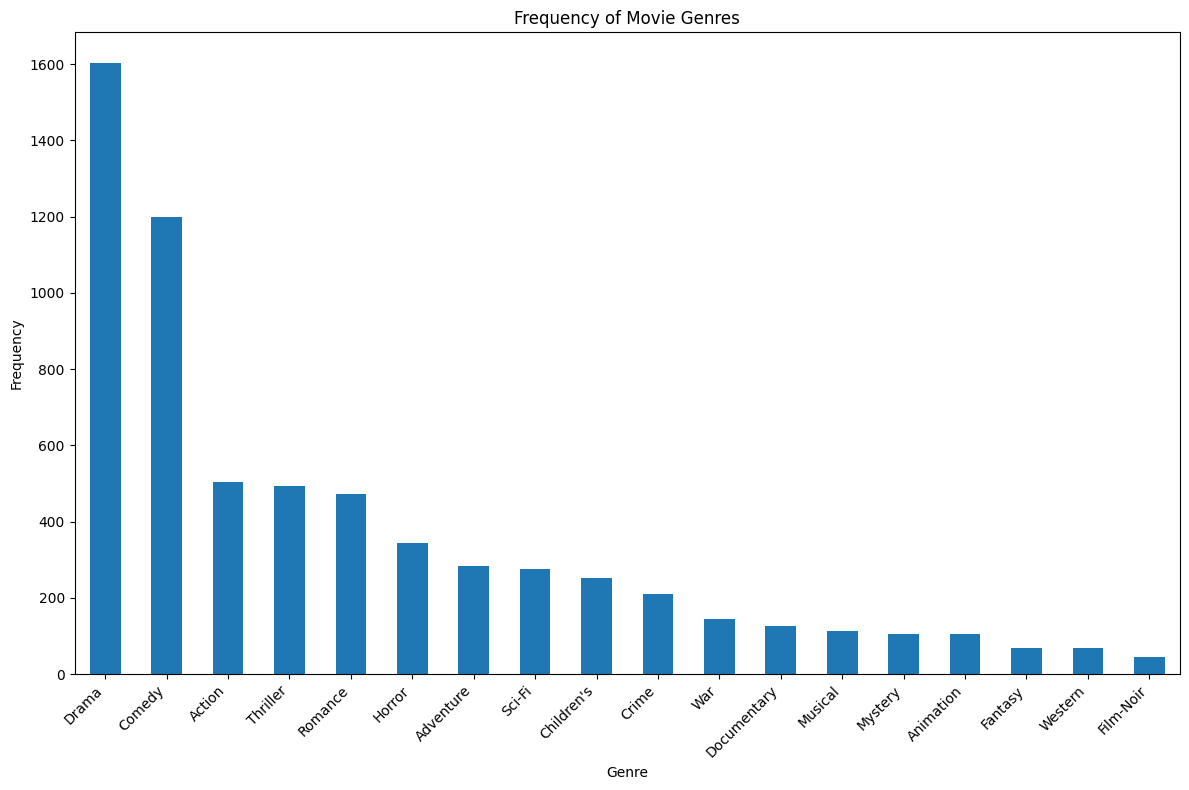

In [ ]:
# Retrieve genres from the database
query_genres = "SELECT genres FROM movielens.data_movies;"
rows_genres = session.execute(query_genres)

# Process genres to count frequencies
genre_counts = {}
for row in rows_genres:
    genres_list = row.genres.split('|')
    for genre in genres_list:
        genre = genre.strip()
        if genre:
            genre_counts[genre] = genre_counts.get(genre, 0) + 1

# Convert counts to a pandas Series for easier plotting
genre_series = pd.Series(genre_counts).sort_values(ascending=False)

# Visualize genre frequencies
plt.figure(figsize=(12, 8))
genre_series.plot(kind='bar')
plt.title('Frequency of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* Visualize the bar plot showing no.of movies released in a particular year

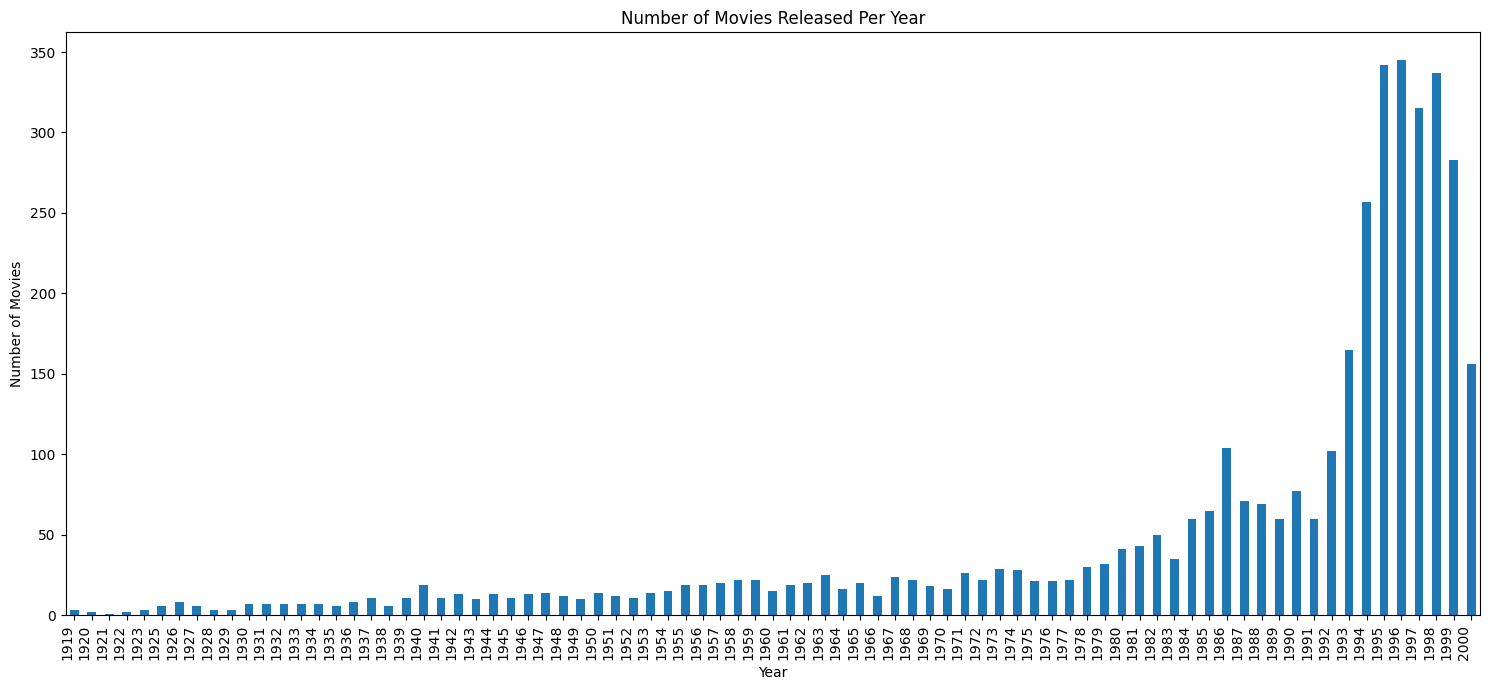

In [ ]:
# Extract year from movie titles
data_movies['year'] = data_movies['title'].str.extract(r'\((\d{4})\)')

# Count the number of movies per year
movies_per_year = data_movies['year'].value_counts().sort_index()

# Visualize the number of movies per year
plt.figure(figsize=(15, 7))
movies_per_year.plot(kind='bar')
plt.title('Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

* Depict the plot of Age groups ratio who are active in watching movies

**Hint:** Use the following query.

query = 'select age from cds_mov.data_users;'

{35: 1193, 56: 380, 25: 2096, 1: 222, 45: 550, 18: 1103, 50: 496}


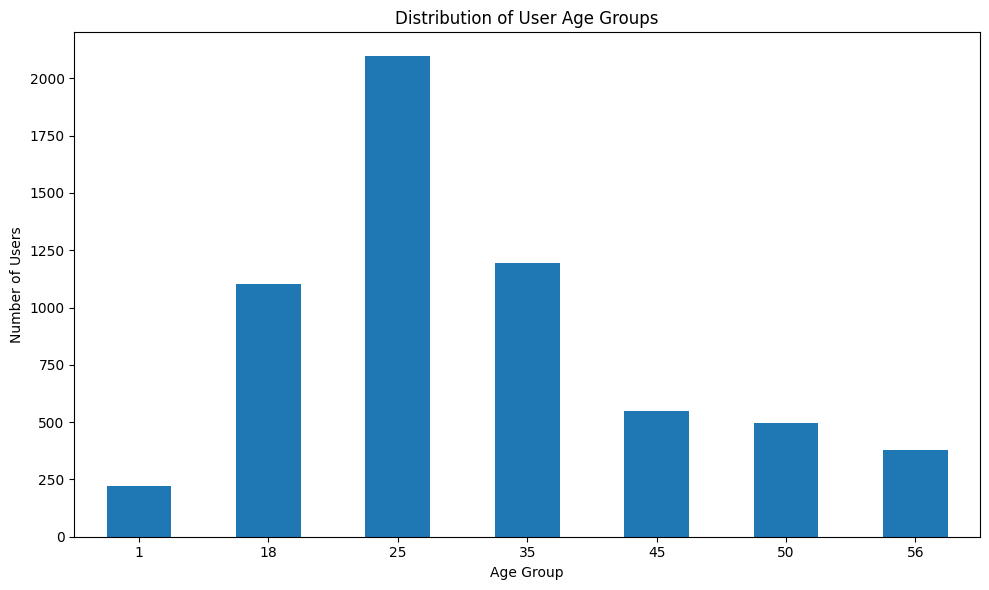

In [ ]:
# Retrieve age data from the database
query_age = "SELECT age FROM movielens.data_users;"
rows_age = session.execute(query_age)

# Process age data to count frequencies
age_counts = {}
for row in rows_age:
    age = row.age
    if age in age_counts:
        age_counts[age] += 1
    else:
        age_counts[age] = 1

print(age_counts)

# Convert counts to a pandas Series for easier plotting
age_series = pd.Series(age_counts).sort_index()

# Visualize age group distribution
plt.figure(figsize=(10, 6))
age_series.plot(kind='bar')
plt.title('Distribution of User Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Analyzing the Data (3 points)

Analyzing the correlation between the movies records, implement a function to recommend movies based on search term

* Retrieve all the data from ratings table

**Hint:** Use the following query.

query = 'select * from cds_mov.data_ratings;'

In [ ]:
query = 'select * from movielens.data_ratings;'
rows = session.execute(query)

* Create a movie matrix by applying pivot table with the above retrieved ratings data

* use `pd.pivot_table` with index = `userid`, columns = `movieid` and Values = `rating`

 **Hint:** create a dataframe with above retrieved ratings data to apply pivot table

In [ ]:
# Convert the results to a list of dictionaries
ratings_list = []
for row in rows:
    ratings_list.append({'movieid': row.movieid, 'rating': row.rating, 'userid': row.userid})

# Create a pandas DataFrame from the list
data_ratings_df = pd.DataFrame(ratings_list)

display(data_ratings_df.head())

,movieid,rating,userid
0,3372,4,299
1,3372,5,344
2,3372,3,348
3,3372,4,435
4,3372,4,637


In [ ]:
# Create a movie matrix using pivot table
movie_matrix = data_ratings_df.pivot_table(index='userid', columns='movieid', values='rating')

# Handle missing values (NaN = 0)
movie_matrix = movie_matrix.fillna(0)

display(movie_matrix.head())

movieid,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
userid,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* Define a function named `recommend_movies()` which will take a movieid as argument and return the top 5 similar movieid's

    * Considering the argument (movieid) as search item collect the particular row data
    
    * Using movie matrix calculate correlation between movie search Item data and all the remaining data
    
        * Hint: [corr_with()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corrwith.html)
        
    * Sort the result by ascending order and return the top 5 items

In [ ]:
def recommend_movie(movieid):
    """
    Recommends the top 5 similar movies based on the movie matrix.

    Args:
        movieid (int): The ID of the movie to recommend similar movies for.

    Returns:
        pandas.Series: A Series containing the top 5 most similar movie IDs,
                       sorted by correlation in descending order.
    """
    # Get the ratings for the input movie
    movie_ratings = movie_matrix[movieid]

    # Calculate the correlation between the input movie and all other movies
    similar_movies = movie_matrix.corrwith(movie_ratings)

    # Drop the input movie itself from the results
    similar_movies = similar_movies.drop(movieid)

    # Sort the similar movies by correlation in descending order and get the top 5
    recommended_movies = similar_movies.sort_values(ascending=False).head(5)

    return recommended_movies

* write a query to get MovieId of a Title (your choice) and the result MovieId as a search item by calling the above defined function

In [ ]:
# Choose a movie title
movie_title = 'Contact (1997)'
# movie_title = 'Boy Who Could Fly, The (1986)'
# movie_title = 'Lake Placid (1999)'

# Query to get the movieid for the chosen title
query_movieid = f"SELECT movieid, genres FROM movielens.data_movies WHERE title = '{movie_title}' ALLOW FILTERING;"
row_movieid = session.execute(query_movieid).one()

if row_movieid:
    movie_id = row_movieid.movieid
    movie_genres = row_movieid.genres
    print(f"The MovieId for '{movie_title}' is: {movie_id} and Geners is '{movie_genres}'")

    # Get recommendations using the recommend_movie function
    recommendations = recommend_movie(movie_id)

    print(f"\nTop 5 movie recommendations for '{movie_title}':")
    print(recommendations)
else:
    print(f"Could not find the MovieId for '{movie_title}'.")

The MovieId for 'Contact (1997)' is: 1584 and Geners is 'Drama|Sci-Fi'

Top 5 movie recommendations for 'Contact (1997)':
movieid
1653    0.471269
32      0.461047
1396    0.451993
1527    0.418655
1909    0.412292
dtype: float64


* Now taking the result of top 5 items (MovieId's) write a query to retrieve the Movie title from movies table

In [ ]:
# Get the list of recommended movie IDs
recommended_movie_ids = recommendations.index.tolist()

# Query to get the titles for the recommended movie IDs
# Using IN clause for multiple movieids
query_titles = f"SELECT movieid, title, genres FROM movielens.data_movies WHERE movieid IN ({','.join(map(str, recommended_movie_ids))});"

rows_titles = session.execute(query_titles)

print("\nRecommended Movie Titles:")
for row in rows_titles:
    print(f"MovieId: {row.movieid}, Title: {row.title}, Genres: {row.genres}")


Recommended Movie Titles:
MovieId: 32, Title: Twelve Monkeys (1995), Genres: Drama|Sci-Fi
MovieId: 1396, Title: Sneakers (1992), Genres: Crime|Drama|Sci-Fi
MovieId: 1527, Title: Fifth Element, The (1997), Genres: Action|Sci-Fi
MovieId: 1653, Title: Gattaca (1997), Genres: Drama|Sci-Fi|Thriller
MovieId: 1909, Title: X-Files: Fight the Future, The (1998), Genres: Mystery|Sci-Fi|Thriller


**Close the session**

In [ ]:
session.shutdown()
cluster.shutdown()